# College Essay Prompt Clustering

The goal of this program is to use nlp to eventually cluster college essay prompts from different colleges. Given that there are hundreds of prompts, the program will need to perform unsupervised clustering (also I don't really want to spend an afternoon labelling prompts).

## Importing modules

nltk        | all sorts of NLP related things, such as tokenizing, stopwords, and lemmatizing (explained later)
numpy       | array-related actions, especially with 2D arrays
matplotlib  | plotting/graphing
random      | set seed, choose samples in k means, etc.
sklearn     | data preprocessing and machine learning algorithms (aka scikit-learn)
gsdmm       | clustering alg downloaded from github repo
wordninja   | split consecutive words with no spaces between them
requests    | access link and get html
re          | regex, search text for patterns


In [169]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

import numpy as np
# import torch
import matplotlib.pyplot as plt

import random
import math


import sklearn
from sklearn.cluster import KMeans

from gsdmm import MovieGroupProcess

import wordninja

import time
import json

# TRY THIS OUT
# https://github.com/nlptown/nlp-notebooks/blob/master/Simple%20Sentence%20Similarity.ipynb


from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer

import re

import spacy

nlp = spacy.load("en_core_web_trf")

# nltk.download('punkt')
# nltk.download("stopwords")
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')

In [69]:
def consecutiveUpper(string):
    # string.toLower() != string
    prev = False

    for letter in string:
        curr = letter.isupper()

        if prev and curr:
            return True

        prev = curr
    
    return False

In [153]:
# obtain word bag

prop_nouns = []
start_words = []

def get_bag(docs, out_list, word_list):
    # out_list = []

    stop_words = set(stopwords.words("english") + ["etc", "'s", ""])

    for include in ["what", "where", "when", "why", "who", "how"]:
        stop_words.discard(include)
        

    for doc in docs:

        separated_words = word_tokenize(doc[1])
        
        tagged_list = nltk.pos_tag(separated_words)
        
        lemmatizer = WordNetLemmatizer()
        lemmatized_list = []

        alpha_regex = re.compile('^[a-zA-Z]+$')

        at_start = True

        for word in tagged_list:

            if alpha_regex.match(word[0]):
                if at_start:
                    start_words.append(word[0])
                    at_start = False

                if len(word[0]) > 1:
                    if not consecutiveUpper(word):
                        split_word = wordninja.split(word[0])

                        # print(split_word, word)

                        if len(split_word) > 1:
                            word = (split_word[0], word[1])

                            for subword in split_word[1:]:
                                tagged_list.append(subword)

                if word[0] not in stop_words:
                    if len(word[0]) > 1:
                        pos = ""
                        if word[1] == "NNP":
                            prop_nouns.append(word[0])
                        
                        if word[1][0] == "J":
                            pos = "a"
                        elif word[1][0] == "N":
                            pos = "n"
                        elif word[1][0] == "V":
                            pos = "v"
                        elif word[1][0] == "R":
                            pos = "r"
                        else:
                            continue

                        lemmatized_list.append(lemmatizer.lemmatize(word[0], pos=pos))

                word_list += lemmatized_list
                out_list.append(" ".join(lemmatized_list))
            else:
                if word[0] in ["?", ".", "!"]:
                    at_start = True

        
    return out_list, word_list



    # # if "?" not in doc[1]:
    #     #     print(doc[1])

    #     for word in seperated_words:
    #         # word = word.lower()

    #         # gets rid of non alphabetic characters
    #         word = nonalpha_regex.sub('', word)
            
    #         if word not in stop_words:
    #             if len(word) != 1:
    #                 if consecutiveUpper(word):
    #                     filtered_list.append(word)
    #                 else:
    #                     for subword in wordninja.split(word):
    #                         filtered_list.append(subword)
                        
                    

    #                 # filtered_list.append(word)
    #                 # # if word[1:].toLower() != word[1:]:

    #                 # # for subword in wordninja.split(word):
    #                 # #     filtered_list.append(subword)

In [ ]:
# # obtain word bag

# prop_nouns = []

# def get_bag(docs, out_list, word_list):
#     # out_list = []

#     stop_words = set(stopwords.words("english") + ["etc", "'s", ""])

#     for include in ["what", "where", "when", "why", "who", "how"]:
#         stop_words.discard(include)
        

#     for doc in docs:
#         filtered_list = []

#         seperated_words = word_tokenize(doc[1])

#         nonalpha_regex = re.compile('[^a-zA-Z]')

#         # if "?" not in doc[1]:
#         #     print(doc[1])

#         for word in seperated_words:
#             # word = word.lower()

#             # gets rid of non alphabetic characters
#             word = nonalpha_regex.sub('', word)
            
#             if word not in stop_words:
#                 if len(word) != 1:
#                     if consecutiveUpper(word):
#                         filtered_list.append(word)
#                     else:
#                         for subword in wordninja.split(word):
#                             filtered_list.append(subword)
                        
                    

#                     # filtered_list.append(word)
#                     # # if word[1:].toLower() != word[1:]:

#                     # # for subword in wordninja.split(word):
#                     # #     filtered_list.append(subword)
        
#         tagged_list = nltk.pos_tag(filtered_list)
#         # print(tagged_list)
        
#         lemmatizer = WordNetLemmatizer()
#         lemmatized_list = []

#         for word in tagged_list:
#             pos = ""
#             if word[1] == "NNP":
#                 prop_nouns.append(word[0])

#             if word[1][0] == "J":
#                 pos = "a"
#             elif word[1][0] == "N":
#                 pos = "n"
#             elif word[1][0] == "V":
#                 pos = "v"
#             elif word[1][0] == "R":
#                 pos = "r"
#             # elif word[1][0] == "W":
#             #     pos = "w"
#             else:
#                 # print(word)
#                 continue

#             lemmatized_list.append(lemmatizer.lemmatize(word[0], pos=pos))

#         word_list += lemmatized_list
#         out_list.append(" ".join(lemmatized_list))
        
#     return out_list, word_list

In [26]:
file = open("json_data.json")

allprompts = json.load(file)

In [154]:
word_list = []
numPrompts = []
prompt_corpus = []

for college in allprompts:
    numPrompts.append(len(college[1]))
    
    prompt_corpus, word_list = get_bag(college[1], prompt_corpus, word_list)
    

word_list = set(word_list)

for word in set(prop_nouns):
    if word.lower() in word_list:
        # print(word)
        word_list.remove(word)
    # for term in set(word_list):
    #     if word.lower() == term.lower() and word != term:
    #         print(word, term)

# print(prop_nouns)

In [173]:
# print(set(start_words))

print(nltk.pos_tag(test.split()))
# print(prop_nouns)

test = "Briefly elaborate on one of your Stanford activities, a job you hold, or responsibilities you have for your family."


print(nltk.pos_tag(test.split()))

doc = nlp(test.split())
  
# Token and Tag
for token in doc:
  print(token, token.pos_)

[('Briefly', 'NNP'), ('elaborate', 'VBP'), ('on', 'IN'), ('one', 'CD'), ('of', 'IN'), ('your', 'PRP$'), ('Stanford', 'NNP'), ('activities,', 'NN'), ('a', 'DT'), ('job', 'NN'), ('you', 'PRP'), ('hold,', 'VBP'), ('or', 'CC'), ('responsibilities', 'NNS'), ('you', 'PRP'), ('have', 'VBP'), ('for', 'IN'), ('your', 'PRP$'), ('family.', 'NN')]
[('Briefly', 'NNP'), ('elaborate', 'VBP'), ('on', 'IN'), ('one', 'CD'), ('of', 'IN'), ('your', 'PRP$'), ('Stanford', 'NNP'), ('activities,', 'NN'), ('a', 'DT'), ('job', 'NN'), ('you', 'PRP'), ('hold,', 'VBP'), ('or', 'CC'), ('responsibilities', 'NNS'), ('you', 'PRP'), ('have', 'VBP'), ('for', 'IN'), ('your', 'PRP$'), ('family.', 'NN')]


ValueError: [E866] Expected a string or 'Doc' as input, but got: <class 'list'>.

In [133]:
# nltk.pos_tag(["virtually", "Stanford", "undergraduates", "live", "campus", "write", "note", "future", "roommate"])
nonalpha_regex.match("C.")
# ('virtually', 'RB'), ('stanford', 'JJ'), ('undergraduates', 'NNS'), ('live', 'VBP'), ('campus', 'NN'), ('write', 'JJ'), ('note', 'NN'), ('future', 'NN'), ('roommate', 'NN')

NameError: name 'nonalpha_regex' is not defined

In [146]:
random.seed = 111

word_list = list(set(word_list))

random.shuffle(word_list)

print(sorted(word_list, key=lambda x: len(x), reverse=True)[0:10])
print(set(prop_nouns))

['interdisciplinary', 'multidisciplinary', 'Multiculturalism', 'underrepresented', 'Internationalism', 'experimentation', 'extracurricular', 'Extracurricular', 'internationally', 'discouragement']
{'Esp', 'AMC', 'Bridge', 'Sagan', 'Studies', 'Baldwin', 'UNC', 'Tik', 'Foster', 'World', 'Apply', 'Trustees', 'Administration', 'Block', 'Albert', 'Subject', 'Help', 'Mawr', 'Scholars', 'Alabama', 'Access', 'Rochester', 'Occidental', 'April', 'Walsh', 'Wesleyan', 'Board', 'Accelerated', 'Disc', 'DC', 'Inspire', 'GPA', 'USD', 'Media', 'Talks', 'Service', 'How', 'Neighborhood', 'Tricia', 'Holy', 'Stock', 'Dartmouth', 'Personal', 'Artifact', 'First', 'Softball', 'JDP', 'Frederick', 'Donna', 'Mechanical', 'Penn', 'Leadership', 'Women', 'Identify', 'Digital', 'Health', 'Foreign', 'Ursinus', 'Kam', 'Stanford', 'Cultivate', 'Chandler', 'Love', 'University', 'May', 'Norwich', 'Union', 'Charlotte', 'Florence', 'Williams', 'Gay', 'Jayhawks', 'Smart', 'Charleston', 'Metcalf', 'Spanish', 'Regis', 'Traini

In [118]:
test = "what is your name california?".split()

nltk.pos_tag(test)

[('what', 'WP'),
 ('is', 'VBZ'),
 ('your', 'PRP$'),
 ('name', 'NN'),
 ('california?', 'NN')]

In [65]:
# alltitles = []

# for link in college_links:
#     f = requests.get(link)

#     titles = re.findall("<h3 class='mt-2'>(.+?)</h3>", f.text)
#     alltitles += titles

# alltitles = set(alltitles)

# print(len(alltitles))

wordninja.split("wwwbelmonteduhonorsThe")

['www', 'belmonte', 'du', 'honors', 'The']

In [54]:
def indToDict(index):
    numPrompts = []
    for prompts in allprompts:
        numPrompts.append(len(prompts[1]))
    
    total = 0
    for x in range(len(numPrompts)):
        curr = numPrompts[x]

        if (total + curr) > index:
            ind = index - total
            return (x, int(ind))
        
        total += curr

In [56]:
# using sklearn tf-idf

vec = TfidfVectorizer(stop_words='english')

tfidf_matrix = vec.fit_transform(prompt_corpus)

# print("Feature Names n",vec.get_feature_names_out())
# print("Sparse Matrix n",matrix.shape,"n",matrix.toarray())

tfidf_shape = tfidf_matrix.shape
print(tfidf_shape)

tfidf_matrix_indexed = np.hstack((np.arange(tfidf_shape[0])[:, None], tfidf_matrix.toarray()))

(870, 2336)
[[  0.   0.   0. ...   0.   0.   0.]
 [  1.   0.   0. ...   0.   0.   0.]
 [  2.   0.   0. ...   0.   0.   0.]
 ...
 [867.   0.   0. ...   0.   0.   0.]
 [868.   0.   0. ...   0.   0.   0.]
 [869.   0.   0. ...   0.   0.   0.]]


['jacksoncenterinfothenorthsidegateway', 'activitiesclubsorganizations', 'achievementshonorsawards', 'wwwbelmonteduhonorsThe', 'additionalinformation', 'qualitiesexperience', 'selfrepresentation', 'journalistlinguist', 'identitiesreligion', 'identityexpression', 'interdisciplinary', 'Interdisciplinary', 'intersectionality', 'multidisciplinary', 'itemsinformation', 'servicevolunteer', 'SayingExpression', 'WisconsinMadison', 'doneacademically', 'Multiculturalism', 'cluborganization', 'underrepresented', 'Dartmouthrelated', 'Internationalism', 'Underrepresented', 'thoughtprovoking', 'experiencebased', 'internationally', 'characteristics', 'extracurricular', 'preprofessional', 'Extracurricular', 'accomplishments', 'firstgeneration', 'schoolsecondary', 'nonfictionalwho', 'experimentation', 'FirstGeneration', 'programspecific', 'fieldcreativity', 'detailsbenefits', 'learnedprepared', 'PreProfessional', 'globallyminded', 'recommendation', 'selfgovernance', 'curriculumwill', 'citizenleaders', 

Text(0.5, 1.0, 'lengths of prompts')

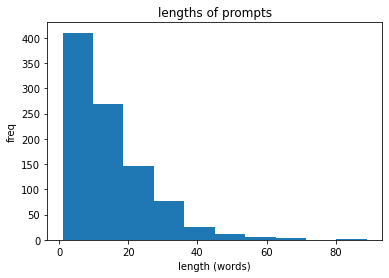

In [62]:
# count doc freq of words

word_freq_matrix = []

word_doc_freq = dict(zip(word_list, [0 for x in range(len(word_list))]))

prompt_len = []

for prompt_ind in range(len(prompt_corpus)):
    curr_freq = dict(zip(word_list, [0 for x in range(len(word_list))]))
    
    # word_counted = False
    # num_words = len(prompt_matrix[prompt_ind][2:])

    prompt_len.append(len(prompt_corpus[prompt_ind].split()))

    for word in prompt_corpus[prompt_ind].split():
        if curr_freq[word] == 0:
            word_doc_freq[word] += 1
            
        curr_freq[word] += 1
    
    # prompt_matrix[prompt_ind] = prompt_matrix[prompt_ind][0:2] + list(curr_freq.values())
    # if sum(curr_freq.values()) <= 1:
    #     print(prompt_matrix[prompt_ind][0:2])
    # word_freq_matrix.append(list(curr_freq.values()))

print(sorted(word_list, key=lambda x: len(x), reverse=True)[0:100])

# most common words
# sorted(word_doc_freq.items(), key=lambda x: x[1], reverse=True)[0:100]

# average length of prompts
prompt_len_np = np.array(prompt_len)

print("Mean: " + str(np.mean(prompt_len_np)))

print("Max: " + str(max(prompt_len_np)))

print("Min: " + str(min(prompt_len_np)))

print("Std dev: " + str(np.std(prompt_len_np)))

plt.hist(prompt_len)

plt.xlabel("length (words)")
plt.ylabel("freq")
plt.title("lengths of prompts")

In [24]:
# turn prompts into vectors
# stores number of docs with word w

# word_freq_matrix = []

# word_doc_freq = dict(zip(word_list, [0 for x in range(len(word_list))]))

# for prompt_ind in range(len(prompt_matrix)):
#     curr_freq = dict(zip(word_list, [0 for x in range(len(word_list))]))
    
#     # word_counted = False
#     # num_words = len(prompt_matrix[prompt_ind][2:])

#     for word in prompt_matrix[prompt_ind][2:]:
#         if curr_freq[word] == 0:
#             word_doc_freq[word] += 1
            
#         curr_freq[word] += 1
    
#     # prompt_matrix[prompt_ind] = prompt_matrix[prompt_ind][0:2] + list(curr_freq.values())
#     if sum(curr_freq.values()) <= 1:
#         print(prompt_matrix[prompt_ind][0:2])
#     word_freq_matrix.append(list(curr_freq.values()))

# print(word_doc_freq)


In [27]:
# tf-idf from scratch

# prompt_vectors = []

# for vector_ind in range(len(word_freq_matrix)):
#     tf_idf_vector = []

#     freq_ind = 0
#     for word_freq in word_freq_matrix[vector_ind]:
#         if word_freq > 0:
#             tf = word_freq / sum(word_freq_matrix[vector_ind])

#             if (tf > 1):
#                 print(vector_ind)
#                 print(word_freq, sum(word_freq_matrix[vector_ind]))
#             # print(len(word_list))
#             # print(len(word_freq_matrix[vector_ind]))

#             # look into idf...
#             # https://towardsdatascience.com/tf-term-frequency-idf-inverse-document-frequency-from-scratch-in-python-6c2b61b78558
            
#             idf = math.log(len(word_freq_matrix) / word_doc_freq[word_list[freq_ind]])
#             tf_idf_vector.append(tf * idf)

#             if (tf*idf > 1):
#                 print(tf*idf)
#                 print(len(word_freq_matrix), word_doc_freq[word_list[freq_ind]])
#         else:
#             tf_idf_vector.append(0)
#         freq_ind += 1
    
#     prompt_vectors.append(prompt_matrix[vector_ind][0:2] + tf_idf_vector)


In [58]:
# # pytorch PCA
# prompt_tensor = torch.tensor(prompt_matrix, dtype=torch.float32)

# print(prompt_tensor.shape)

# torch.manual_seed(333)
# U, S, V = torch.pca_lowrank(prompt_tensor[:,2:], q=None, center=True, niter=3)

# pca_axes = torch.matmul(prompt_tensor[:,2:], V[:, :7])

# # sklearn PCA

from sklearn.decomposition import PCA
# prompt_np_array = np.asarray(prompt_vectors)

# print(prompt_np_array.shape)

pca = PCA(n_components=700)

# pca.fit(prompt_np)

print(tfidf_matrix_indexed.shape)

# pca_data = pca.fit_transform(prompt_np_array[:,2:])
pca_data = pca.fit_transform(tfidf_matrix_indexed[:,1:])

pca_data = np.hstack((np.arange(pca_data.shape[0])[:, None], pca_data))

# print(pca_data[0:100])

# print(pca.score(pca_data))

# pca_data[0,]

(870, 2337)


In [ ]:
# print(pca_axes[...,0])
# print(max(pca_axes[:,0]))


# combo plot
num_comps = pca_data.shape[1]-1

fig, axs = plt.subplots(num_comps, num_comps)

fig.set_size_inches(18.5, 10.5, forward=True)

fig.set_dpi(100)

for i in range(1, num_comps+1):
    for j in range(1, num_comps+1):
        axs[i-1][j-1].scatter(pca_data[:,i]+1, pca_data[:,j]+1)

# plt.setp(axs, xlim=[0.977,1.00], ylim=[0.977,1.00])

plt.show()

# interesting note: almost all the plots have a central clump and then one or more very pronounced arms
# need to consider whether PCA is meaningful for nlp clustering


# # single plot

# fig = plt.figure(figsize=(20,20))
# plt.scatter(pca_axes[:,0], pca_axes[:,1], s=20)

# fig.set_dpi(100)

422


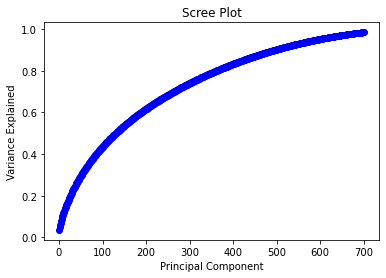

In [59]:
PC_values = np.arange(pca.n_components_) + 1

cumulative_var = [sum(pca.explained_variance_ratio_[0:x+1]) for x in range(len(pca.explained_variance_ratio_))]

i=0
for x in cumulative_var:
    if x > 0.85:
        print(i)
        break
    i+=1
        

plt.plot(PC_values, cumulative_var, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
print(sum(pca.explained_variance_ratio_))

0.07858510745459976


In [ ]:
# k-means for any dim, points is list of vectors in n-dim

def select_init(points, k, labels):
    random.seed = (333)

    dist_weights = []
    centroids = []

    centroids.append(np.asarray(random.choice(points)))

    while len(centroids) < k:
        dist_weights = find_distances(points, centroids, labels)
        # print()
        centroids.append(np.asarray(random.choices(points, weights=dist_weights)[0]))
    
    # print(centroids)
    return centroids


def find_distances(points, centroids, labels = 0):
    clusters = [[] for x in range(len(centroids))]
    closest_dists = []
    # print(centroids)

    for curr_point in points:

        # should be large enough given that words will rarely 
        #   occur more than even 20 times in one prompt
        min_dist = 100000000
        min_ind = len(centroids)
        for j in range(len(centroids)):
            curr_dist = sum((centroids[j][labels:] - curr_point[labels:]) ** 2) ** 0.5
            # print(centroids[j][labels:])
            # print(curr_dist, j)
            if curr_dist < min_dist:
                min_dist = curr_dist
        
        closest_dists.append(min_dist)
        # print(min_ind)
        
    return closest_dists


def find_clusters(points, centroids, labels = 0):
    clusters = [[] for x in range(len(centroids))]

    for curr_point in points:

        # should be large enough given that words will rarely 
        #   occur more than even 20 times in one prompt
        min_dist = 100000000
        min_ind = len(centroids)
        for j in range(len(centroids)):
            curr_dist = sum((centroids[j][labels:] - curr_point[labels:]) ** 2) ** 0.5
            if curr_dist < min_dist:
                min_dist = curr_dist
                min_ind = j
        
        # print(min_ind)
        clusters[min_ind].append(curr_point)

    return clusters


def k_means(points, k, labels = 0):

    # random.seed(133)
    print(labels)

    centroids = select_init(points, k, labels)

    # centroids = random.sample(points, k)

    for center_num in range(k):
        centroids[center_num] = np.asarray(centroids[center_num])
    
    # print(centroids)
    equal_means = 0
    clusters = []

    while equal_means < k:
        clusters = find_clusters(points, centroids, labels)
        # print(clusters[0])
        for i in range(k):
            # mean = [0 for x in range(len(points) - labels)]

            # for point_ind in range(1, len(clusters[i])):
            #     mean[point_ind] += clusters[i][point_ind] / len(clusters[i])

            mean = sum(np.asarray(clusters[i])) / len(clusters[i])

            dim = labels
            curr_equal_means = True
            while (dim < len(points[0])) and curr_equal_means:
                if (mean[dim] != centroids[i][dim]):
                    centroids[i] = mean
                    curr_equal_means = False
                dim += 1
            
            if dim == len(points[0]):
                equal_means += 1
    
    return clusters

1
9


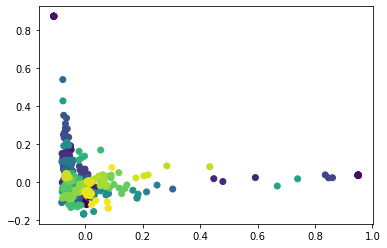

In [ ]:
# pca_points = [[pca_data[:,1][i], pca_data[:,2][i]] for i in range(len(pca_data[:,1]))]

pca_points = [list(pca_data[i,0:3]) for i in range(len(pca_data[:,1]))]

# print(pca_points)
num_clusters = 60

pca_clusters = k_means(pca_points, num_clusters, labels = 1)

# EVERYTHING IS IN ONE CLUSTER AHHHHH
print(len(pca_clusters[0]))

pca_clusters_graph = []

for c in range(len(pca_clusters)):
    for x in pca_clusters[c]:
        pca_clusters_graph.append(x + [c])

pca_clusters_graph = np.asarray(pca_clusters_graph)

plt.scatter(pca_clusters_graph[:,1], pca_clusters_graph[:,2], c = pca_clusters_graph[:,3])

In [11]:
n = 3
print(len(pca_clusters[n]))
for point in pca_clusters[n]:
    # print(point[0])
    r, c = indToDict(point[0])

    # print(r, c)

    # print(allprompts[1][1][2])

    print(allprompts[int(r)][1][int(c)])

NameError: name 'pca_clusters' is not defined

In [ ]:
all_clusters = k_means(tfidf_matrix_indexed, 50, labels = 1)

for x in all_clusters:
    print(len(x))

1
8
70
6
13
12
29
4
22
21
7
28
13
7
24
35
8
13
17
37
19
18
9
12
13
2
35
12
22
28
10
23
28
27
13
3
11
11
30
11
17
10
6
16
9
22
19
16
11
5
28


In [ ]:
n = 1
for x in all_clusters[n:n+1]:
    print(len(x))

    print(x)

    for i in range(0, len(x)):
        # school_ind = x[i][0]
        # prompt_ind = x[i][1]
        # print(x[i])
        school_ind, prompt_ind = indToDict(x[i][0])

        # print(school_ind, prompt_ind)

        print(selected_schools[allprompts[int(school_ind)][0]], allprompts[int(school_ind)][1][int(prompt_ind)])

# current issue: the vectors are basically just clustering based on their order in rankings
# solutions: 1) randomize word_list order
#            2) uhhhhh why does it still group them by order wtf


70
[array([4., 0., 0., ..., 0., 0., 0.]), array([17.,  0.,  0., ...,  0.,  0.,  0.]), array([22.,  0.,  0., ...,  0.,  0.,  0.]), array([27.        ,  0.        ,  0.16671799, ...,  0.        ,
        0.        ,  0.        ]), array([56.,  0.,  0., ...,  0.,  0.,  0.]), array([58.        ,  0.        ,  0.32990621, ...,  0.        ,
        0.        ,  0.        ]), array([72.,  0.,  0., ...,  0.,  0.,  0.]), array([83.,  0.,  0., ...,  0.,  0.,  0.]), array([125.,   0.,   0., ...,   0.,   0.,   0.]), array([126.,   0.,   0., ...,   0.,   0.,   0.]), array([128.,   0.,   0., ...,   0.,   0.,   0.]), array([152.,   0.,   0., ...,   0.,   0.,   0.]), array([155.,   0.,   0., ...,   0.,   0.,   0.]), array([161.,   0.,   0., ...,   0.,   0.,   0.]), array([166.,   0.,   0., ...,   0.,   0.,   0.]), array([174.,   0.,   0., ...,   0.,   0.,   0.]), array([183.,   0.,   0., ...,   0.,   0.,   0.]), array([191.,   0.,   0., ...,   0.,   0.,   0.]), array([210.,   0.,   0., ...,   0.,   0.

In [ ]:
# using sklearn KMeans function
elbow = []

for i in range(1, 100):
    print(i)
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 333)
    kmeans.fit(tfidf_matrix_indexed[:,1:])
    elbow.append(kmeans.inertia_)

1


C:\Users\VChen2022\Miniconda3\envs\scikit\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


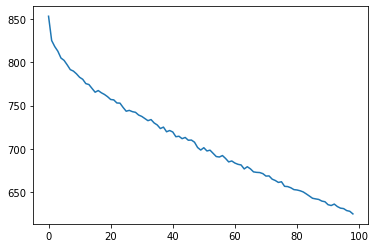

In [ ]:
plt.plot(elbow)

In [60]:
import hdbscan

cluster_obj = hdbscan.HDBSCAN(min_cluster_size=5, min_samples = 1)

cluster_obj.fit(tfidf_matrix.toarray())

HDBSCAN(min_samples=1)

In [61]:
print(sum([x for x in cluster_obj.labels_ if x == -1]))
print(max(cluster_obj.labels_[0:10]))

-532
31


C:\Users\VChen2022\Miniconda3\envs\scikit\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\VChen2022\Miniconda3\envs\scikit\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


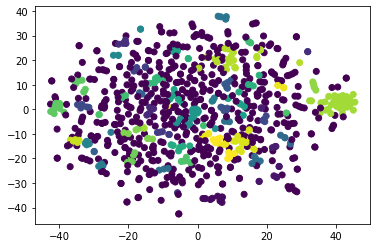

In [62]:
# cluster_obj.probabilities_

# cluster_obj.single_linkage_tree_.plot()

np.random.seed = 222

projection = sklearn.manifold.TSNE().fit_transform(tfidf_matrix.toarray())
plt.scatter(*projection.T, c=cluster_obj.labels_)

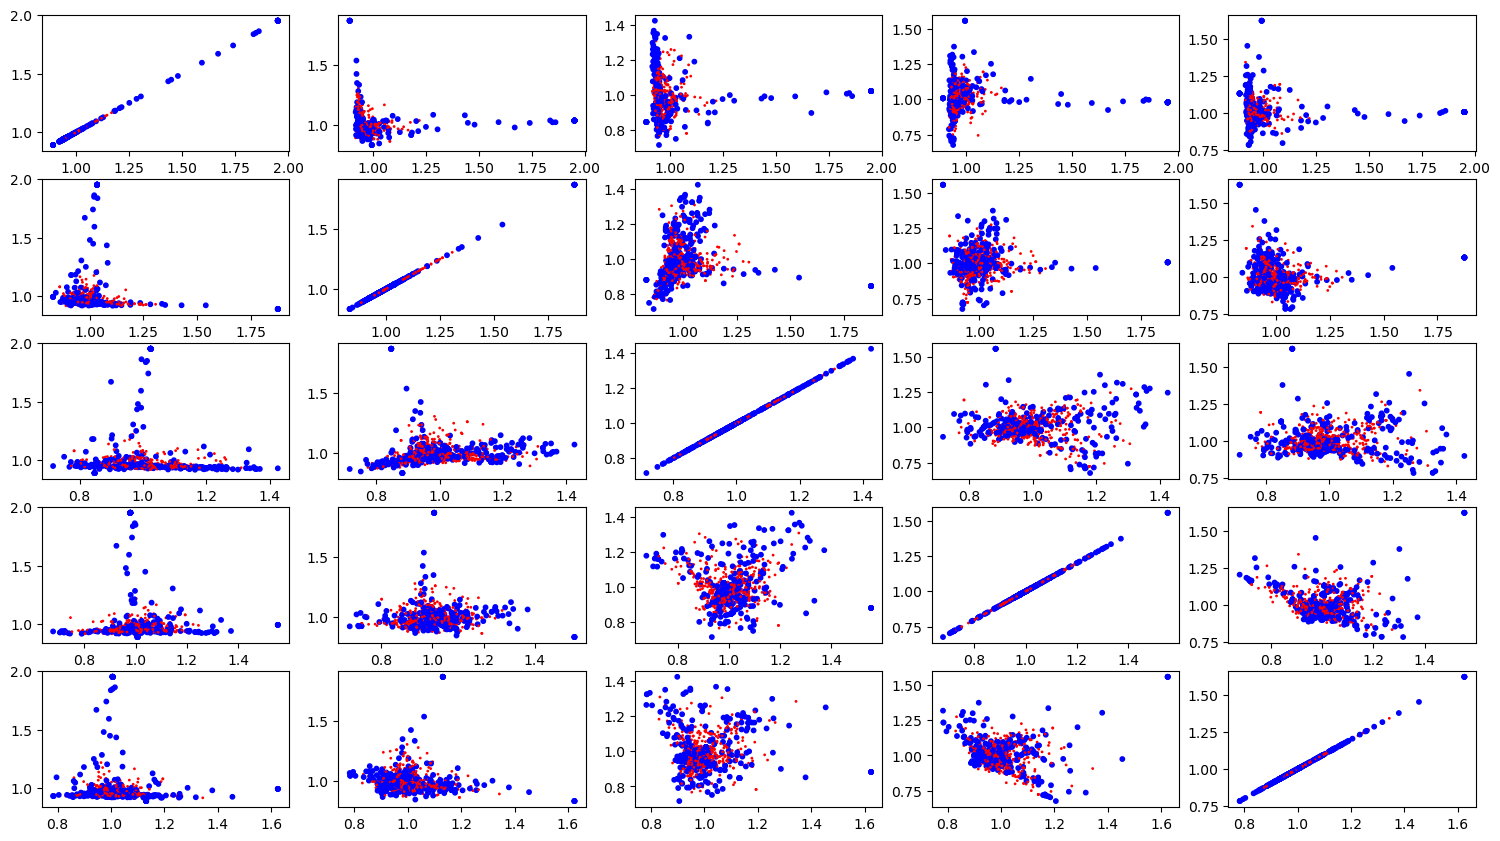

In [ ]:
# plt.scatter(pca_clusters_graph[:,0], pca_clusters_graph[:,1], c = cluster_obj.labels_)


#change rhis 
num_comps = 6

fig, axs = plt.subplots(num_comps-1, num_comps-1)

fig.set_size_inches(18.5, 10.5, forward=True)

fig.set_dpi(100)

for i in range(1, num_comps):
    for j in range(1, num_comps):
        axs[i-1][j-1].scatter(pca_data[:,i]+1, pca_data[:,j]+1, c = ["red" if x < 0 else "blue" for x in cluster_obj.labels_], s=[1 if x < 0 else 10 for x in cluster_obj.labels_])

In [92]:
gsdmm = MovieGroupProcess(K=15, alpha=0.1, beta=0.3, n_iters=15)

# fit GSDMM model

[prompt_corpus[x].split() for x in prompt_corpus]

y = gsdmm.fit(prompt_corpus, len(word_list))

In stage 0: transferred 807 clusters with 12 clusters populated
In stage 1: transferred 112 clusters with 2 clusters populated
In stage 2: transferred 53 clusters with 2 clusters populated
In stage 3: transferred 41 clusters with 2 clusters populated
In stage 4: transferred 40 clusters with 2 clusters populated
In stage 5: transferred 45 clusters with 2 clusters populated
In stage 6: transferred 53 clusters with 2 clusters populated
In stage 7: transferred 48 clusters with 2 clusters populated
In stage 8: transferred 45 clusters with 2 clusters populated
In stage 9: transferred 41 clusters with 2 clusters populated
In stage 10: transferred 31 clusters with 2 clusters populated
In stage 11: transferred 29 clusters with 2 clusters populated
In stage 12: transferred 45 clusters with 2 clusters populated
In stage 13: transferred 66 clusters with 2 clusters populated
In stage 14: transferred 67 clusters with 2 clusters populated


In [ ]:
gsdmm.cluster_word_distribution

[0, 0, 0, 0, 0, 0, 0, 0, 769, 0, 0, 0, 0, 0, 101]

In [ ]:
# to-do 
# [X] conda env export > environment.yml 
# [?] incorporate select-a-prompts
# [?] check for weird symbols, i.e. "&amp"
# [] figure out issue with multi paragraph prompts
# [*] use nltk to process prompts
# [*] look into tf-idf
# [X] download matplotlib on school computer
# [*] clustering
#  - - [x] k-means based on euclidean dist
#  - - [] k-means based on cosine similarity?
#  - - [] hierarchical
# [X] commit and push yml file to remote
# [?] create list translating between ranking and name, basically watch out for 288 and maybe 404
#  - - [] use array instead of dictionary for allprompts? if looking for original, just use index...
# [*] try larger number of clusters (100?)
# [] look into ML algs for unsupervised clustering, maybe NN?
# [] filter words?
# [] generalize words, i.e. proper nouns are roughly the same idea
# [] favor specific words
# [] consider words in context, not just in isolation
# [] create general forms for prompt archetypes


# https://towardsdatascience.com/different-techniques-to-represent-words-as-vectors-word-embeddings-3e4b9ab7ceb4
# https://www.analyticsvidhya.com/blog/2020/08/top-4-sentence-embedding-techniques-using-python/
# https://towardsdatascience.com/a-friendly-introduction-to-text-clustering-fa996bcefd04